University of California Los Angeles  
Master of Quantitative Economics -MQE-  
ECON 451 - Financial Institutions and Monetary Policy

<p style='text-align: right;'>Bella Rakhina </p>
<p style='text-align: right;'>William Ebert </p>
<p style='text-align: right;'>Nikolaos Papadatos </p>
<p style='text-align: right;'>Luis Alejandro Samayoa</p>

<div style="text-align: center;">

<h1>Homework 2 - Flow of Funds</h1>

</div>

In [24]:
# import excel file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.stats as stats
from scipy.stats import norm
from scipy.optimize import newton
from datetime import datetime
import seaborn as sns
import networkx as nx
from statistics import NormalDist

## Question 1

The below binomial tree represents the asset price of an underlying 2-year European style put option. Compute the value of the put option using the replicating portfolio method with the following parameters.

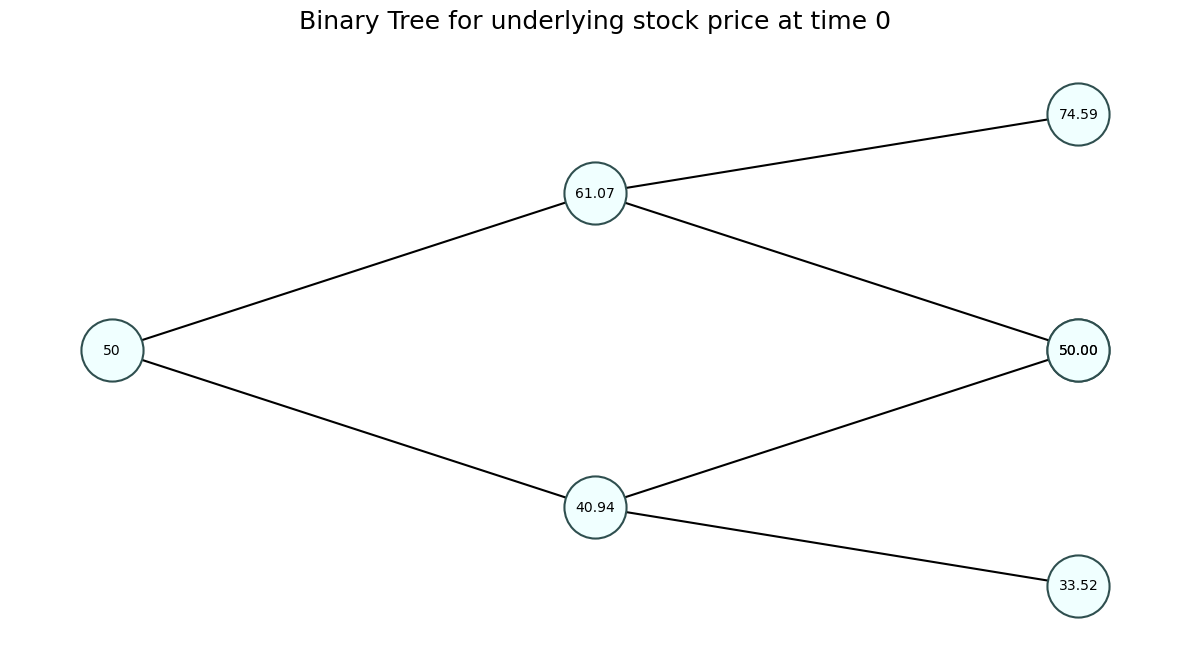

In [12]:
# Create an empty graph
plt.figure(figsize=(12, 6))
G = nx.Graph()

# Add nodes with labels
G.add_node(0, label='50')
G.add_node(1, label='61.07')
G.add_node(2, label='40.94')
G.add_node(3, label='74.59')
G.add_node(4, label='50.00')
G.add_node(5, label='50.00')
G.add_node(6, label='33.52')

# Add edges
G.add_edge(0, 1)
G.add_edge(0, 2)
G.add_edge(1, 3)
G.add_edge(1, 4)
G.add_edge(2, 5)
G.add_edge(2, 6)

# Set positions for the nodes
pos = {0: (0, 0), 1: (1, 1), 2: (1, -1), 3: (2, 1.5), 4: (2, 0), 5: (2, 0), 6: (2, -1.5)}

# Draw the graph with labels
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='azure', edgecolors='darkslategrey', linewidths=1.5)
nx.draw_networkx_edges(G, pos, width=1.5)
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels, font_size=10)

# Remove axis

plt.axis('off')

# Show the plot
plt.tight_layout()
plt.title('Binary Tree for underlying stock price at time 0', fontsize = 18, y=1.05)
plt.show()

The value for the put option at $t = 2$ is 
- European asset price: 74.59; put value: 0 (do not exercise)
- European asset price: 50.00; put value: $55-50=5$
- European asset price: 50.00; put value: $55-50=5$
- European asset price: 33.52; put value: $55-33.52=21.48$

The value for the put option at $t = 1$ is 
- European asset price: 61.07; put value: 2.027
- European asset price: 40.94; put value: 11.44

$$5 = \Delta(50) + B(1.05); \space 0 = \Delta(74.59) + B(1.05)$$
$$P_{t=1} = -0.203(61.07) + 14.44$$
$$P_{t=1} = 2.03$$

$$21.48 = \Delta(33.52) + B(1.05); \space 5 = \Delta(50) + B(1.05)$$
$$P_{t=1} = -1(40.94) + 52.38$$
$$P_{t=1} = 11.44$$

The value for the put option at $t = 0$ is 
- European asset price: 61.07; put value: 5.77
- 
$$11.44 = \Delta(40.94) + B(1.05); \space 2.03 = \Delta(61.07) + B(1.05)$$
$$P_{t=0} = -0.467(50) + 29.13$$
$$P_{t=0} = 5.77$$

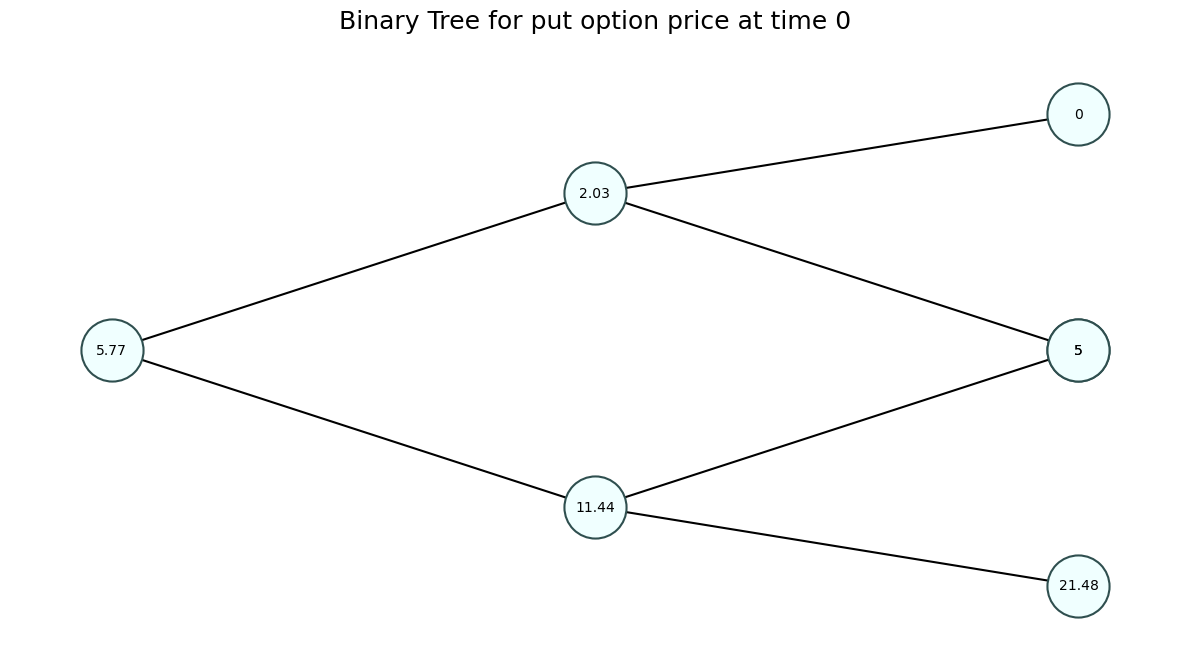

In [11]:
# Create an empty graph
plt.figure(figsize=(12, 6))
G = nx.Graph()

# Add nodes with labels
G.add_node(0, label='5.77')
G.add_node(1, label='2.03')
G.add_node(2, label='11.44')
G.add_node(3, label='0')
G.add_node(4, label='5')
G.add_node(5, label='5')
G.add_node(6, label='21.48')

# Add edges
G.add_edge(0, 1)
G.add_edge(0, 2)
G.add_edge(1, 3)
G.add_edge(1, 4)
G.add_edge(2, 5)
G.add_edge(2, 6)

# Set positions for the nodes
pos = {0: (0, 0), 1: (1, 1), 2: (1, -1), 3: (2, 1.5), 4: (2, 0), 5: (2, 0), 6: (2, -1.5)}

# Draw the graph with labels
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='azure', edgecolors='darkslategrey', linewidths=1.5)
nx.draw_networkx_edges(G, pos, width=1.5)
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels, font_size=10)

# Remove axis

plt.axis('off')

# Show the plot
plt.tight_layout()
plt.title('Binary Tree for put option price at time 0', fontsize = 18, y=1.05)
plt.show()

## Question 2

For this analysis, we selected Bank of America. We downloaded quarterly call reports starting from Q1 2021 through Q4 2023.

### 2.a
Report it’s total asset and (face) debt positions for the last three years in a table (end of year positions are fine). Cite your source.

In [4]:
data = pd.read_csv ("BofA.csv")
data

,Quarter,Total Assets - item 12,Total Liabilities - item 21
0,Q1 2021,"2,316,773,000","2,096,341,000"
1,Q2 2021,"2,350,294,000","2,124,998,000"
2,Q3 2021,"2,400,819,000","2,172,437,000"
3,Q4 2021,"2,519,525,000","2,283,098,000"
4,Q1 2022,"2,513,619,000","2,284,227,000"
5,Q2 2022,"2,440,022,000","2,209,100,000"
6,Q3 2022,"2,407,902,000","2,178,965,000"
7,Q4 2022,"2,418,508,000","2,193,059,000"
8,Q1 2023,"2,518,290,000","2,285,819,000"
9,Q2 2023,"2,449,804,000","2,219,795,000"


In the quarterly call report, there is a Balance Sheet (Form Type - 031) on page 19, reported in thousands of dollars. For total assets, we refer to Item 12, which is **"Total assets (sum of items 1 through 11)."** This includes:

1. Cash and balances due from depository institutions
2. Securities
3. Federal funds sold and securities purchased under agreements to resell
4. Loans and lease financing receivables
5. Trading assets
6. Premises and fixed assets
7. Other real estate owned
8. Investments in unconsolidated subsidiaries and associated companies
9. Direct and indirect investments in real estate ventures
10. Intangible assets
11. Other assets

For the **debt components**, we looked added Item 21 , **Total Liabilities (sum of the items 13 through 20)**

13. Deposits:
    a. In domestic offices - Noninterest-bearing and Interest-bearing
    b. In foreign offices - Noninterest-bearing and Interest-bearing
14. Federal funds purchased and securities sold under agreements to repurchase:
    a. Federal funds purchased in domestic 
    b.Securities sold under agreements to repurchase10
15. Trading liabilities 
16. Other borrowed money (includes mortgage indebtedness and obligations under capitalized leases)
19. Subordinated notes and debentures1
20. Other liabilities

### 2.b
What is the variance in the firm’s asset value?

In [5]:
data_q4 = data.loc[[3, 7, 11]]
data_q4

,Quarter,Total Assets - item 12,Total Liabilities - item 21
3,Q4 2021,"2,519,525,000","2,283,098,000"
7,Q4 2022,"2,418,508,000","2,193,059,000"
11,Q4 2023,"2,540,116,000","2,303,910,000"


In [6]:
# need to remove commas from the numbers and convert to integers
data_q4['Total Assets  - item 12'] = data_q4['Total Assets  - item 12'].replace(',', '', regex=True).astype('Int64')
# calculating the variance of total assets
variance_q4 = data_q4['Total Assets  - item 12'].var()
print(f'The variance of total assets is {variance_q4}')

The variance of total assets is 4236154872333333.5


In [7]:
deviation = np.sqrt(4236154872333333.5)
print(f'The standard deviation of total assets is {deviation}')

The standard deviation of total assets is 65085750.14804188


### 2.c  
What is the average 10 year Treasury bond rate over the last three years (corresponding the years covered in your table)? Cite your source.

In [34]:
bond_rate = pd.read_excel("DGS10.xlsx")
bond_rate.head()

,DATE,DGS10
0,2019-05-02,2.55
1,2019-05-03,2.54
2,2019-05-06,2.51
3,2019-05-07,2.45
4,2019-05-08,2.49


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_2520\1322218207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['DATE'] = data_filtered['DATE'].astype(str)
C:\Users\Alejandro\AppData\Local\Temp\ipykernel_2520\1322218207.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['DGS10'] = pd.to_numeric(data_filtered['DGS10'], errors='coerce')


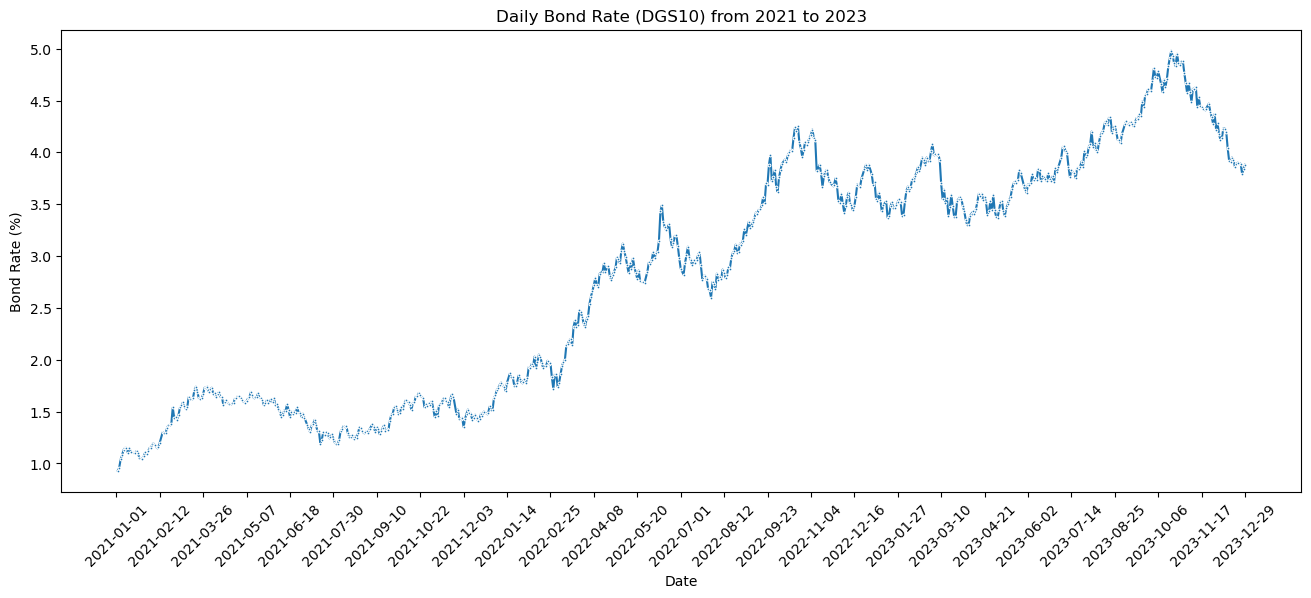

In [32]:

# Filter the data for the 2021-2023 period
data_filtered = bond_rate[(bond_rate['DATE'] >= '2021-01-01') & (bond_rate['DATE'] <= '2023-12-31')]
data_filtered['DATE'] = data_filtered['DATE'].astype(str)
data_filtered['DGS10'] = pd.to_numeric(data_filtered['DGS10'], errors='coerce')

# Create the plot
plt.figure(figsize=(16, 6))
sns.lineplot(x='DATE', y='DGS10', data=data_filtered, marker='o', markersize=2)

# Set plot title and labels
plt.title('Daily Bond Rate (DGS10) from 2021 to 2023')
plt.xlabel('Date')
plt.ylabel('Bond Rate (%)')

# Customize x-axis tick marks
n = 30  # Show ticks for every 30th date
plt.xticks(data_filtered['DATE'][::n], rotation=45)

# Show the plot
plt.show()

In [11]:
average_rate = data_filtered['DGS10'].mean()
print(f'The average bond rate from 2021 to 2023 is {average_rate.round(4)}')


The average bond rate from 2021 to 2023 is 2.7835


### 2.d 
Use the values computed above as inputs into the Black-Scholes model to value equity as a call option. Assume for this question that the debt is a zero-coupon bond with horizon 10 years. What other assumptions do you need to make to use the Black-Scholes model as presented in class?

In [12]:
# Need to remove commas from the numbers and convert to integers
data_q4['Total Liabilities - item 21'] = data_q4['Total Liabilities - item 21'].replace(',', '', regex=True).astype(np.int64)

data_q4['Total Liabilities - item 21']

3     2283098000
7     2193059000
11    2303910000
Name: Total Liabilities - item 21, dtype: int64

In [13]:
# Total Assets for Q4 2023
print('Total Assets for Q4 2023:', data_q4['Total Assets  - item 12'][11])

# Total Debts for Q4 2023
print('Total Debts for Q4 2023:', data_q4['Total Liabilities - item 21'][11])

# Total Equity for Q4 2023
print('Total Equity for Q4 2023:', data_q4['Total Assets  - item 12'][11]- data_q4['Total Liabilities - item 21'][11])

Total Assets for Q4 2023: 2540116000
Total Debts for Q4 2023: 2303910000
Total Equity for Q4 2023: 236206000


In [14]:
# Standard Deviation
print('Standard Deviation is:', round(np.sqrt(variance_q4), 6))
print('Standard Deviation as a share of Total Assets:', round(np.sqrt(variance_q4), 3) / data_q4['Total Assets  - item 12'][11])

Standard Deviation is: 65085750.148042
Standard Deviation as a share of Total Assets: 0.025623140891203395


In [15]:
# Double Check Variance Calculation

# Mean for variance calc
mv = np.mean(data_q4['Total Assets  - item 12'])
#mv

# Manual check
a = abs((data_q4['Total Assets  - item 12'][3]) - mv)**2
b = abs((data_q4['Total Assets  - item 12'][7]) - mv)**2
c = abs((data_q4['Total Assets  - item 12'][11]) - mv)**2

round(np.sqrt((a+b+c)/(3-1)), 3)

65085750.148

#### Black-Scholes Model

In [25]:
# Define the Black-Scholes Model

mu = np.mean(data_q4['Total Assets  - item 12'])
sigs = round(np.sqrt(variance_q4), 6) # Adjust for variance

def black_scholes(S, K, T, r, sigma, option='call'):
    d1 = (np.log(S / K) + ((r + (0.5 * (sigma ** 2))) * T)) / (sigma * np.sqrt(T))
    d2 = d1 - (sigma*np.sqrt(T))
    
    if option == 'call':
        return (S * stats.norm.cdf(d1, scale = sigs )) - (K * np.exp(-r * T) * stats.norm.cdf(d2, scale = sigs ))
    if option == 'put':
        return (K * np.exp(-r * T) * stats.norm.cdf(-d2, scale = sigs)) - (S * stats.norm.cdf(-d1, scale = sigs))
    
# Alternative way to calculate d2
# d2 = (np.log(S / K) + ((r - (0.5 * (sigma ** 2))) * T)) / (sigma * np.sqrt(T))

In [26]:
# Set parameters
S = (data_q4['Total Assets  - item 12'][11]) 
K = (data_q4['Total Liabilities - item 21'][11]) 
T = 10
r = 0.0278        # 10 year T-bond average interest rate
sigma = round((np.sqrt(variance_q4)), 6)

# C = call option
# S = Current stock
# K = Strike price
# r = Risk-free interest rate
# t = time to maturity
# N = normal distribution 

To calculate Black-Scholes, we must make a number of assumptions. 
Firstly, we must make a series of assumption standard for any calculation using the Black-Scholes model:

- No dividends are paid out during the life of the option
- Markets are random
- No transaction costs 
- The risk-free rate and volatility are known and constant
- Returns are normally distributed.
- Can only be exercised at expiration

Secondly, we must make a series of assumptions which are unique to own asset and its valuation:
- The current stock is priced the same as the value of the Total Assets
- The strike price is priced the same as the value of the Total Liabilities
- the risk-free interest rate is equivalent to 10 year T-bonds over the last few years

In [27]:
# Call and Put Price for Black Scholes

call_price = black_scholes(S, K, T, r, sigma, option='call')
put_price = black_scholes(S, K, T, r, sigma, option='put')

print(f"Call price: {call_price:.2f}")
print(f"Put price: {put_price:.2f}")

Call price: 2296208291.70
Put price: 1500836011.75


We can also look at Black-Scholes for a current value of BofA stock option.

In [28]:
# Define the Black-Scholes Model

def black_scholesY(S, K, T, r, sigma, option='call'):
    d1 = (np.log(S / K) + ((r + (0.5 * (sigma ** 2))) * T)) / (sigma * np.sqrt(T))
    d2 = d1 - (sigma*np.sqrt(T))
    
    if option == 'call':
        return (S * stats.norm.cdf(d1)) - (K * np.exp(-r * T) * stats.norm.cdf(d2))
    if option == 'put':
        return (K * np.exp(-r * T) * stats.norm.cdf(-d2)) - (S * stats.norm.cdf(-d1))
    
# Alternative way to calculate d2
# d2 = (np.log(S / K) + ((r - (0.5 * (sigma ** 2))) * T)) / (sigma * np.sqrt(T))

In [29]:
# As May 5th, a June 20th, 2025 call option for BofA from Yahoo finance (highest volume option)

S = 37.25
K = 50
T = 1.125             # 1 year and half a month maturity
r = 0.05              # Assume similar to 1-year treasure 
sigma = 0.2564


call_priceY = black_scholesY(S, K, T, r, sigma, option='call')
put_priceY = black_scholesY(S, K, T, r, sigma, option='put')

print(f"Call price: {call_priceY:.2f}")
print(f"Put price: {put_priceY:.2f}")

Call price: 1.19
Put price: 11.21


As of May 5th, the last listed price was 0.79 (assuming 1 year treasury rate) indicating that the asset is valued less than Black-Scholes would estimate. 

In [30]:
print('Value of the outstanding debt', (data_q4['Total Assets  - item 12'][11] - call_price))

Value of the outstanding debt 243907708.30305862


In [31]:
print('Interest Rate on Debt', (data_q4['Total Assets  - item 12'][11] / 243907708.30305862)**(1/10) -1)

# Value of the outstanding debt is assumed to be very low

Interest Rate on Debt 0.2640457780973313


The average 10-year Treasury bond rate over the last three years from 2021 to 2023 is approximately 2.78% according to FRED (https://fred.stlouisfed.org/series/RIFLGFCY10NA)

## Question 3

Search for data on call options (either through a website on the internet or the Bloomberg Terminal).
#### 3.a  
Find a call option for a commercial bank of your choosing Cite your source.

**Answer:**
* *The selected commercial bank was Bank of America. The source of data is Yahoo Finance, with the prices of call options corresponding to expiration dates May 31, July 19, September 20 and December 20, all of 2024. The data was downloaded March 30 of 2024.*

In [3]:
# Import excel file
df = pd.read_excel('data_BAC_call.xlsx')
df.head(3)

,Contract,Expiration_date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,BAC240531C00026000,2024-05-31,26,10.8,10.55,12.75,0.0,0.0,20,8,0.7012
1,BAC240531C00029000,2024-05-31,29,8.1,8.55,8.85,0.0,0.0,8,6,0.5684
2,BAC240531C00030000,2024-05-31,30,8.1,5.70,7.90,0.0,0.0,1,2,0.6309


#### 3.b
Plot the implied volatility for a given horizon at different strike prices.

**Answer:**
* *In order to compare the implied volatility calculated by Yahoo Finance with that calculated using the Black-Scholes formula, we follow a procedure that takes into account the number of days to maturity.*

In [4]:
# Current price of the underlying asset
current_price = yf.download('BAC', start='2024-04-29')["Adj Close"][0]
# Get the risk free rate using 3 month treasury bills
risk_free_rate = yf.download('^IRX', start='2024-04-29')["Adj Close"][0] / 100

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


* *We estimate the time to expiration as a fraction of a year. We then execute a function to estimate the implied volatility considering the Black-Scholes formula.*

In [5]:
# Add additional columns
df['Current Price'] = current_price
df['Risk Free Rate'] = risk_free_rate

# Convert to datetime
today = pd.to_datetime('today').normalize()
df['Expiration_date'] = pd.to_datetime(df['Expiration_date'])

# Calculate time to expiration
df['Time to Expiration'] = (df['Expiration_date'] - today) / pd.Timedelta(days=365)


In [6]:
# Function to calculate implied volatility using the Black-Scholes formula and the Newton-Raphson method

def implied_volatility(C, S, K, r, t):
    # Initialize implied volatility (you can adjust this)
    sigma = 0.2

    # Maximum number of iterations for the Newton-Raphson method
    max_iterations = 100
    tolerance = 1e-6

    for _ in range(max_iterations):
        d1 = (1 / (S * np.sqrt(t))) * (np.log(S / K) + (r + 0.5 * sigma**2) * t)
        d2 = d1 - sigma * np.sqrt(t)

        # Calculate the call option price using the Black-Scholes formula
        call_price = S * stats.norm.cdf(d1) - K * np.exp(-r * t) * stats.norm.cdf(d2)

        # Calculate the Vega (sensitivity to volatility)
        vega = S * np.sqrt(t) * stats.norm.pdf(d1)

        # Update implied volatility using the Newton-Raphson method
        sigma -= (call_price - C) / vega

        # Check for convergence
        if abs(call_price - C) < tolerance:
            break

    return sigma

In [7]:
# Estimate imply volatility
df['Estimated Implied Volatility'] = df.apply(lambda row: implied_volatility(
    row['Last Price'],
    row['Current Price'],
    row['Strike'],
    row['Risk Free Rate'],
    row['Time to Expiration']
), axis=1)

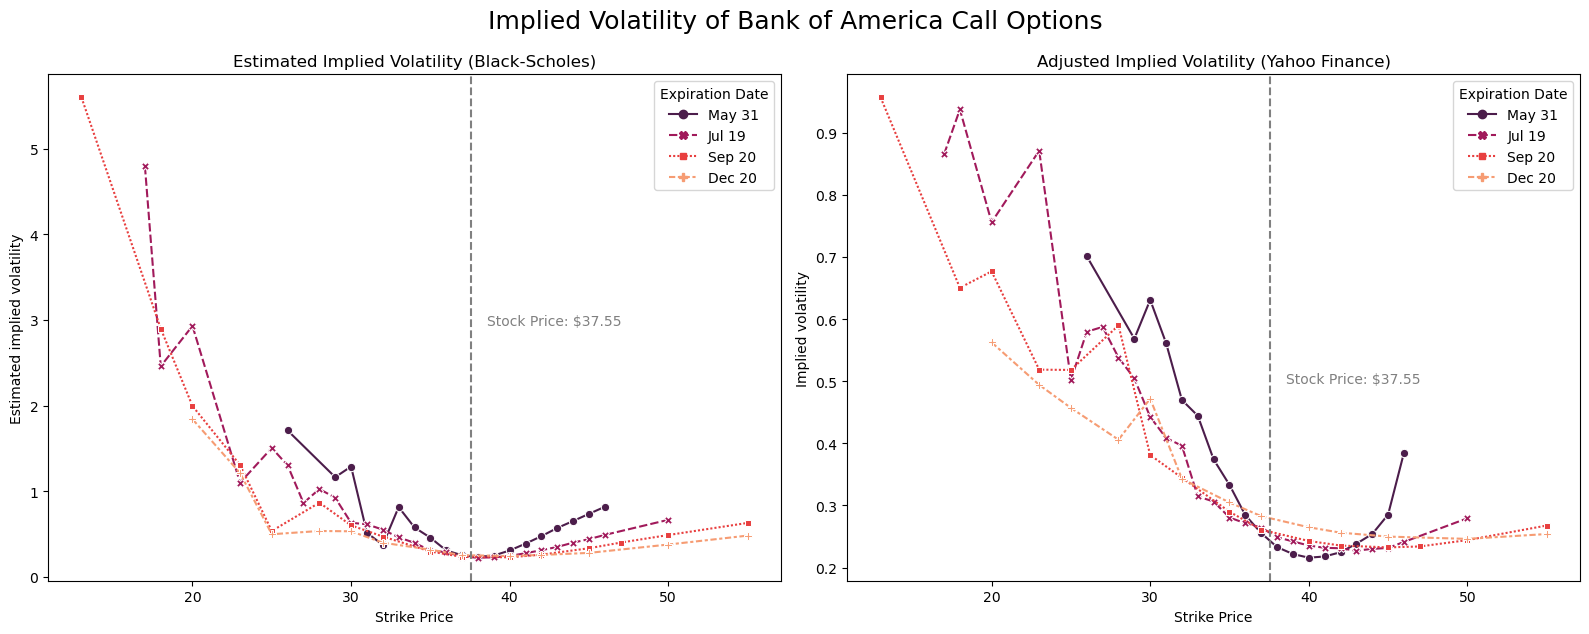

In [20]:
# Function to generate plot
def generate_plot(data, y_variable, title):
    sns.lineplot(x='Strike', y=y_variable, 
                 hue='Expiration_date', data=data, palette=custom_palette, 
                 markers=True, style='Expiration_date', 
                 legend='full')  # Show full legend
    # Add title and labels
    plt.title(title)
    plt.xlabel('Strike Price')
    plt.ylabel(f'{y_variable.capitalize()}')
    # Add vertical line at specific value of X (representing stock price)
    plt.axvline(x=current_price, color='grey', linestyle='--')  # Vertical line
    plt.text(current_price + 1, plt.gca().get_ylim()[1] * 0.5, f'Stock Price: ${current_price.round(2)}', color='grey')  # Text annotation

# Plot
# Specify color palette
custom_palette = sns.color_palette("rocket", 4)  # You can choose any palette, "husl" is just an example

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First subplot
plt.subplot(1, 2, 1)
generate_plot(df, 'Estimated Implied Volatility', 'Estimated Implied Volatility (Black-Scholes)')

# Customizing legend labels
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['May 31', 'Jul 19', 'Sep 20', 'Dec 20']  # Custom legend labels
plt.legend(handles, labels, title='Expiration Date')

# Second subplot
plt.subplot(1, 2, 2)
generate_plot(df, 'Implied Volatility', 'Adjusted Implied Volatility (Yahoo Finance)')

# Adjust legend position
#plt.legend(loc='upper left')
# Customizing legend labels
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['May 31', 'Jul 19', 'Sep 20', 'Dec 20']  # Custom legend labels
plt.legend(handles, labels, title='Expiration Date')
# Show plot
plt.tight_layout()
plt.suptitle('Implied Volatility of Bank of America Call Options', fontsize = 18, y=1.05)
plt.show()

#### 3.c
Is there a pattern?

**Answer:**
* *An observable trend arises in the implied volatility of call options for Bank of America. Both estimates, whether calculated using the Black-Scholes formula or adjusted by Yahoo Finance, show increased volatility when the strike price is far from the current price of the asset. As the strike price gets closer to the current price, the volatility decreases. Moreover, the implied volatility tends to be elevated when the strike price is substantially lower than the current price. Additionally, implied volatility decreases as the time to expiration extends. In both graphs, the curve for May 31 is consistently higher than the curve for December 20.*

#### 3.d

Is the Bid, Ask, or Realized value closer to where the implied volatility comes from?

**Answer:**
* *The implied volatility of a call option of Bank of America shows a positive trend with the Price of the options (Bid and Ask too). The implied volatility of a call option tends to increase with the price of the option due to higher demand for insurance against price movements in the underlying asset, increased uncertainty in the market, and the associated rise in the volatility premium embedded in option prices.*

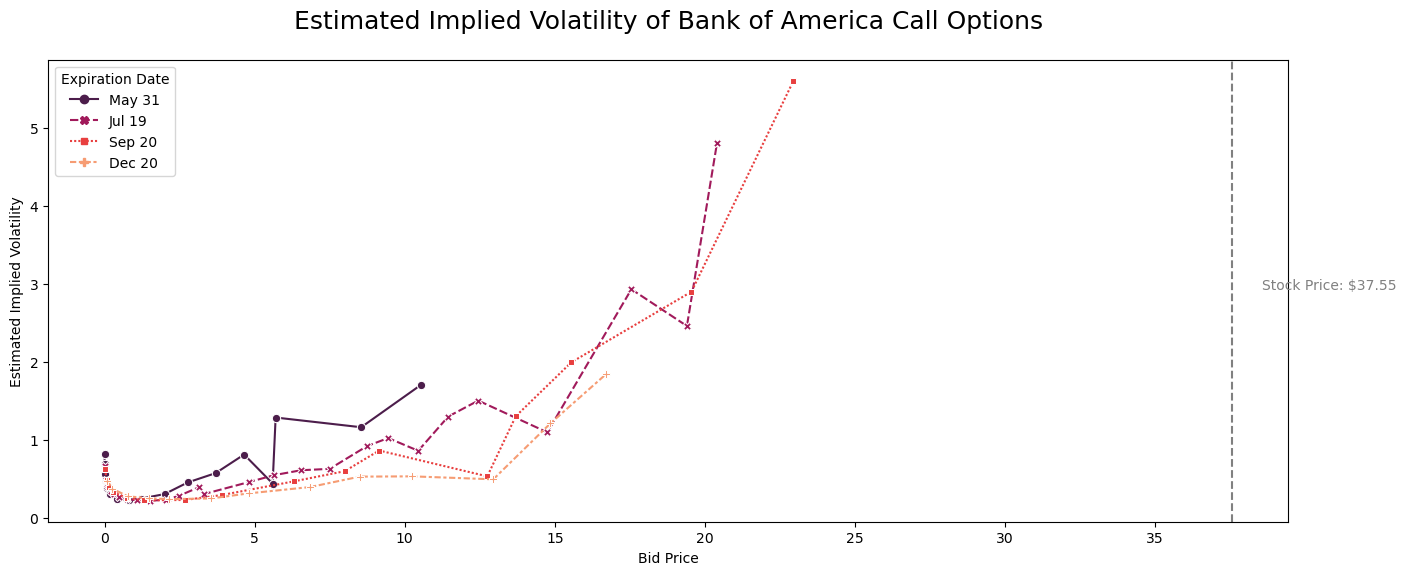

In [11]:
# Plot
# Specify color palette
custom_palette = sns.color_palette("rocket", 4)  # You can choose any palette, "husl" is just an example

# Plot with hue and palette
plt.figure(figsize=(16, 6))
sns.lineplot(x='Bid', y='Estimated Implied Volatility', 
             hue='Expiration_date', data=df, palette=custom_palette, 
             markers=True, style='Expiration_date', 
             legend="full")

# Customizing legend labels
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['May 31', 'Jul 19', 'Sep 20', 'Dec 20']  # Custom legend labels
plt.legend(handles, labels, title='Expiration Date')

# Add title and labels
plt.title('Estimated Implied Volatility of Bank of America Call Options', fontsize=18, y=1.05)
plt.xlabel('Bid Price')
plt.ylabel('Estimated Implied Volatility')

# Add vertical line at specific value of X (representing stock price)
plt.axvline(x=current_price, color='grey', linestyle='--')  # Vertical line
plt.text(current_price + 1, plt.gca().get_ylim()[1] * 0.5, f'Stock Price: ${current_price.round(2)}', color='grey')  # Text annotation


# Show plot
plt.show()

## Question 4
In this question you will compare the balance sheet of the bank you chose with SVB before it’s failure.

### 4.a 
Now take a more detailed look at the assets and liabilities of the bank you chose. Report the market-value of assets and liabilities broken down into broad categories (say long-term treasuries, short-term treasuries, long-term corporate debt, short-term corporate debt, etc)

### 4.b
Look at the balance sheet of SVB in the few years before it’s failure (use the FFIEC’s website linked above, select the appropriate dates). Report the marketvalue of assets and liabilities broken down into similar broad categories as you did before.

In [12]:
def extract_account_values_for_years(balance_sheet, account_names, year_indices):
    # Filter rows containing the specified account names
    filtered_rows = balance_sheet[balance_sheet['Account Name'].isin(account_names)]
    # Slice columns based on year indices
    sliced_columns = filtered_rows.iloc[:, year_indices]

    return sliced_columns

In [13]:
# import balance sheets excel file
bac = pd.read_excel('balance sheets.xlsx', sheet_name='BAC')
svb = pd.read_excel('balance sheets.xlsx', sheet_name='SVB')
bac.columns = ['Account Name','2022', '2021', '2020', '2019']
svb.columns = ['Account Name','2022', '2021', '2020', '2019']

# List of specific accounts to search for
account_names = [
    "Total Cash & Due from Banks",
    "Investments - Total",
    "Treasury Securities",
    "Mortgage Backed Securities",
    "Net Loans",
    "Total Assets",
    "Total Deposits",
    "Demand Deposits",
    "Savings/Time Deposits",
    "Total Debt",
    "Short Term Debt",
    "Long-Term Debt",
    "Total Equity"
]

bac_summary = extract_account_values_for_years(bac, account_names, [0, 1])
svb_summary = extract_account_values_for_years(svb, account_names, [0, 1])
# Calculate percentage of each account as a fraction of Total Assets

bac_total_assets = bac_summary.loc[bac_summary['Account Name'] == 'Total Assets', '2022'].iloc[0]
svb_total_assets = svb_summary.loc[svb_summary['Account Name'] == 'Total Assets', '2022'].iloc[0]

# Calculate percentage of each account as a fraction of Total Assets
bac_summary['% of Total Assets'] = bac_summary['2022'] / bac_total_assets *100
svb_summary['% of Total Assets'] = svb_summary['2022'] / svb_total_assets *100

# Format the values as currency
bac_summary['2022'] = bac_summary['2022'].map('${:,.0f}'.format)
svb_summary['2022'] = svb_summary['2022'].map('${:,.0f}'.format)
bac_summary['% of Total Assets'] = bac_summary['% of Total Assets'].map('{:.1f}%'.format)
svb_summary['% of Total Assets'] = svb_summary['% of Total Assets'].map('{:.1f}%'.format)

# Merge the two DataFrames
merged_summary = pd.merge(bac_summary, svb_summary, on='Account Name', suffixes=('_BAC', '_SVB'))
merged_summary


,Account Name,2022_BAC,% of Total Assets_BAC,2022_SVB,% of Total Assets_SVB
0,Total Cash & Due from Banks,"$30,334",1.0%,"$9,116",4.3%
1,Investments - Total,"$1,690,063",55.4%,"$125,127",59.1%
2,Treasury Securities,"$159,022",5.2%,"$17,223",8.1%
3,Mortgage Backed Securities,"$665,281",21.8%,"$91,461",43.2%
4,Net Loans,"$1,033,065",33.9%,"$73,614",34.8%
5,Total Assets,"$3,051,375",100.0%,"$211,793",100.0%
6,Total Deposits,"$1,930,341",63.3%,"$173,109",81.7%
7,Demand Deposits,"$640,745",21.0%,"$132,785",62.7%
8,Savings/Time Deposits,"$1,182,590",38.8%,"$6,693",3.2%
9,Total Debt,"$508,908",16.7%,"$19,348",9.1%


### 4.c
Compare the two balance sheets. Are there any salient similarities or differences?

**Asset Composition**
* *The asset composition of BoA's balance sheet is notably diverse, reflecting its broad scope of operations. BoA typically holds a vast portfolio of loans encompassing both consumer and commercial sectors, alongside diverse investments in securities and other financial instruments. Additionally, the bank maintains substantial holdings in real estate and other fixed assets, contributing to the complexity of its asset base. In contrast, SVB's asset composition is more concentrated, reflecting its specialization in serving technology and venture capital firms. As such, a significant portion of SVB's assets is allocated to loans and investments tailored to these specific industries, highlighting its strategic focus but also its exposure to this segment of the economy.*

**Liabilities Composition**
* *The nature and extent of liabilities also differ between the two institutions. BoA's liabilities encompass a broad spectrum, including deposits from retail and corporate clients, various forms of borrowing, and other financial obligations. Given its size and systemic importance, BoA's is required from regulators to have diverse liabilities, accounting for its extensive range of services and activities. In contrast, SVB's liabilities where more tailored to its specialized clientele, comprising deposits from technology companies, venture capital firms, and other stakeholders within its target industries. While SVB's liabilities may be less extensive compared to BoA, they where nonetheless crucial for supporting its banking operations and facilitating its unique business model.*

### 4.d
Are there any risks that you could anticipate for either bank based on the tables you constructed?

**Answer:**
* *From the balance sheets, it's evident that the two banks had major differences in assets and liabilities, both in terms of composition and magnitude. Consequently, we decided to calculate and compare the liquidity risk measures of Bank of America (BAC) and Silicon Valley Bank (SVB), which are proportional figures. This analysis suggested that SVB had been more exposed to liquidity risk relative to BoA.*

* *An initial observation reveals that both banks have relatively healthy current ratios, indicating they possess more current assets than liabilities, ensuring short-term solvency. Additionally, their quick ratios are above 1, implying they hold sufficient liquid assets to cover immediate liabilities without resorting to inventory liquidation.*

* *However, the liquidity coverage ratio (LCR) exposes a significant distinction. BAC boasts an LCR of 1.5, demonstrating a substantial buffer of high-quality liquid assets to meet short-term obligations. In contrast, SVB's LCR of 0.4 suggests a lower level of liquidity and potentially higher vulnerability to short-term liquidity shocks.*

* *SVB's asset composition, with a higher proportion tied up in securities and net loans compared to BAC's greater emphasis on cash and cash equivalents, is a major factor contributing to this disparity. Moreover, SVB relies more on deposits, whereas BAC carries a significant amount of debt, impacting their liquidity profiles differently.*

* *Furthermore, SVB's lower liquidity coverage may be compounded by its smaller market value of assets and liabilities compared to BAC, potentially limiting its ability to quickly mobilize funds in times of need.*